Problem 1.1

缺失值统计：
mpg             0
displacement    0
horsepower      6
weight          0
acceleration    0
dtype: int64


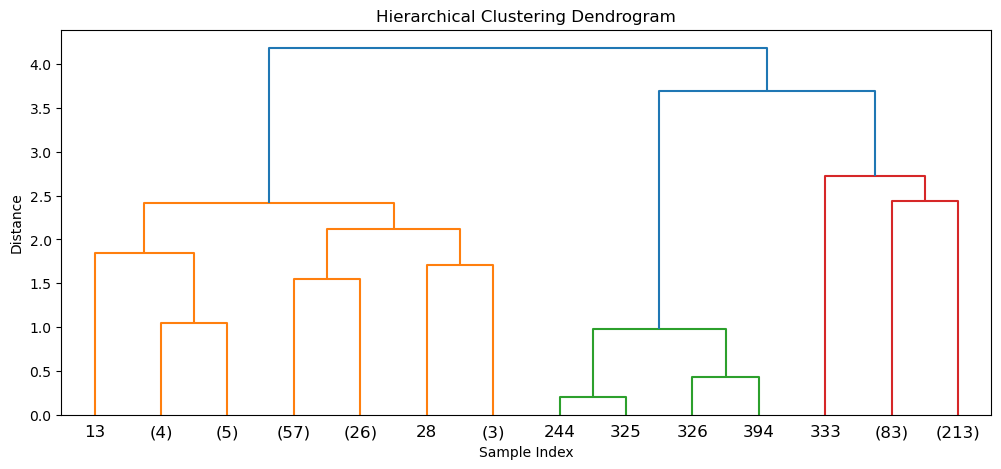


Statistics of clustering results (mean ± variance):
               mpg            displacement               horsepower  \
              mean        var         mean          var        mean   
cluster                                                               
0        26.177441  41.303375   144.304714  3511.485383   86.490964   
1        14.528866   4.771033   348.020619  2089.499570  161.804124   
2        43.700000   0.300000    91.750000    12.250000   49.000000   

                          weight                acceleration            
                var         mean            var         mean       var  
cluster                                                                 
0        295.270673  2598.414141  299118.709664    16.425589  4.875221  
1        674.075816  4143.969072  193847.051117    12.641237  3.189948  
2          4.000000  2133.750000   21672.916667    22.875000  2.309167  

Statistics grouped by origin (mean ± variance):
              mpg            disp

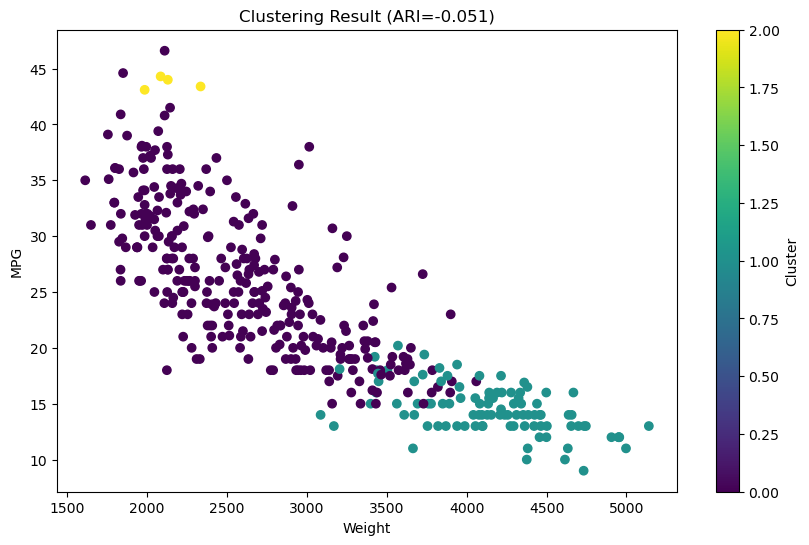

In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
               'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, sep=r'\s+', names=column_names, na_values='?')

# 2. Select continuous fields
continuous_features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df_continuous = df[continuous_features].copy()

# 3. Missing value processing 
print("缺失值统计：")
print(df_continuous.isnull().sum())

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_continuous), columns=continuous_features)

# 4. Data standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

# 5. Hierarchical clustering
# First, draw a tree diagram to determine the appropriate distance threshold
plt.figure(figsize=(12, 5))
Z = linkage(scaled_data, method='average', metric='euclidean')
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Generate 3 clusters based on the threshold selected from the tree diagram
optimal_threshold = 3.5

cluster = AgglomerativeClustering(
    n_clusters=None,
    metric='euclidean',
    linkage='average',
    distance_threshold=optimal_threshold
)
clusters = cluster.fit_predict(scaled_data)

# Ensure to obtain 3 clusters
if len(np.unique(clusters)) != 3:
    print("Warning: The number of generated clusters is not 3, please adjust distance_threshold.")

# 6. Result analysis
df['cluster'] = clusters
ari = adjusted_rand_score(df['origin'], clusters)

# 7. Output result
print("\nStatistics of clustering results (mean ± variance):")
print(df_imputed.groupby(df['cluster']).agg(['mean', 'var']))

print("\nStatistics grouped by origin (mean ± variance):")
print(df_imputed.groupby(df['origin']).agg(['mean', 'var']))

print("\nCross tabulation of clustering and origin:")
print(pd.crosstab(df['cluster'], df['origin']))

print(f"\nARI: {ari:.3f}")

# 8. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['mpg'], c=df['cluster'], cmap='viridis')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title(f'Clustering Result (ARI={ari:.3f})')
plt.colorbar(label='Cluster')
plt.show()

Q: Is there a Clear relationship between cluster assignment and class label? 
A:
1. Statistical characteristics grouped by cluster
   Cluster 1 significantly has the lowest fuel consumption (mpg) and the highest weight and horsepower, representing large displacement, American muscle cars or trucks.
   The MPG of Cluster 2 is as high as 43.7, with extremely low horsepower and weight, making it clearly a small energy-saving vehicle.
   Cluster 0 is an intermediate type, possibly a regular compact sedan.

2. Statistical characteristics grouped by origin
    Vehicles from Japan and Europe generally have higher MPG, lighter weight, and lower horsepower, indicating a design trend towards energy efficiency.
    The low MPG, high horsepower, and heavy weight of American cars clearly correspond to Cluster 1.


3. Correlation analysis between clustering results and origin
    The characteristics of Cluster 1 are very similar to Origin=1 (American cars), indicating that clustering can effectively identify large displacement American cars.
    The high mpg, low horsepower, and low weight of Cluster 2 are clearly consistent with Origin=3 (Japanese car).
    Cluster 0 is in an intermediate state and may be a European car or some American small car.
   
    Through standardization and cluster analysis, vehicles can be automatically classified into three categories based on their numerical characteristics (fuel consumption, horsepower, weight, etc.), which have a clear correspondence with the original regional labels. This indicates that clustering models can to some extent reveal potential category structures in data, especially when these categories are associated with significant physical features such as weight and horsepower.

Problem 1.2

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

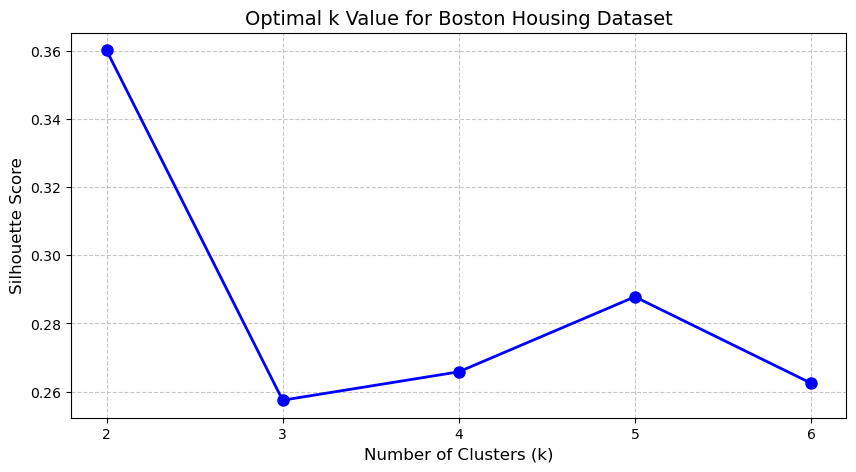

=== Optimal k Value ===
Best k: 2 (Silhouette Score: 0.360)

=== Feature Means by Cluster ===
             CRIM         ZN      INDUS      CHAS       NOX        RM  \
cluster                                                                 
0        0.261172  17.477204   6.885046  0.069909  0.487011  6.455422   
1        9.844730   0.000000  19.039718  0.067797  0.680503  5.967181   

               AGE       DIS        RAD         TAX    PTRATIO           B  \
cluster                                                                      
0        56.339210  4.756868   4.471125  301.917933  17.837386  386.447872   
1        91.318079  2.007242  18.988701  605.858757  19.604520  301.331695   

             LSTAT  
cluster             
0         9.468298  
1        18.572768  

=== Centroid Coordinates ===
       CRIM            ZN      INDUS      CHAS       NOX        RM        AGE  \
0  0.261172  1.747720e+01   6.885046  0.069909  0.487011  6.455422  56.339210   
1  9.844730  1.243450e-1

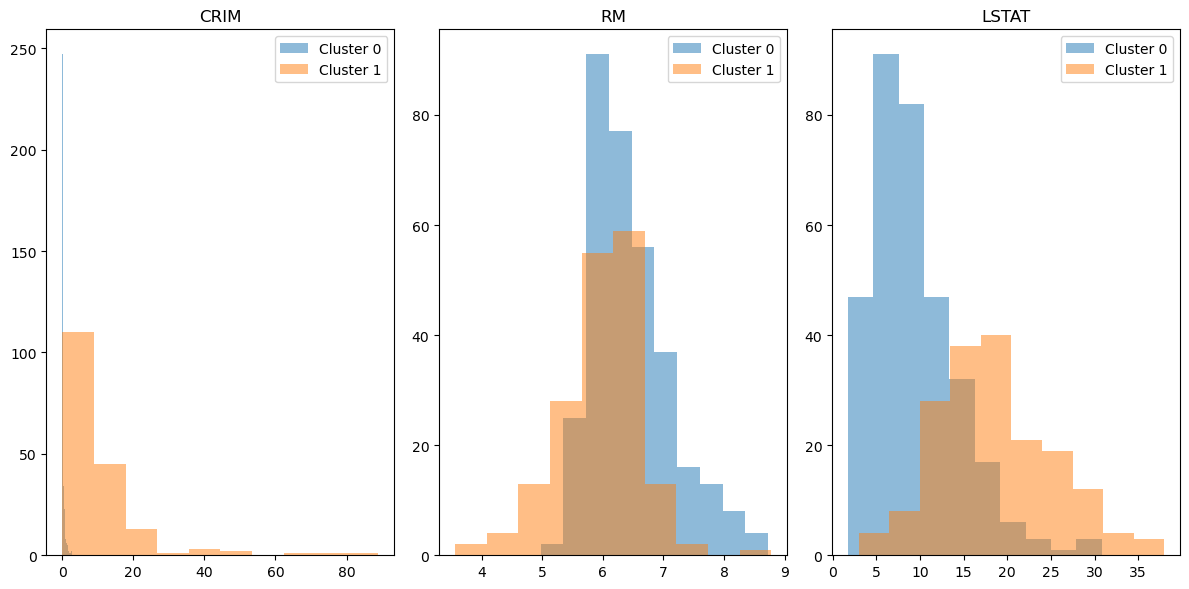

In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Load Boston dataset from original source
def load_boston_alternative():
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep=r'\s+', skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    feature_names = [
        'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
        'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
    ]
    return pd.DataFrame(data, columns=feature_names), target

df, target = load_boston_alternative()

# 2. Data standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. K-means clustering (k from 2 to 6)
silhouette_scores = []
k_values = range(2, 7)
best_k = 2
best_score = -1
best_model = None

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Calculate contour score
    score = silhouette_score(scaled_data, clusters)
    silhouette_scores.append(score)
    
    # Record the optimal k value
    if score > best_score:
        best_score = score
        best_k = k
        best_model = kmeans

# 4. Draw contour score curve
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Optimal k Value for Boston Housing Dataset', fontsize=14)
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5. Output the optimal k value
print(f"=== Optimal k Value ===")
print(f"Best k: {best_k} (Silhouette Score: {best_score:.3f})")

# 6. Analyze the optimal clustering results
df['cluster'] = best_model.labels_

# Calculate the feature mean of each cluster
print("\n=== Feature Means by Cluster ===")
cluster_means = df.groupby('cluster').mean()
print(cluster_means)

# Obtain centroid coordinates (standardized space)
centroids = best_model.cluster_centers_

# Convert the centroid back to the original feature space
original_centroids = scaler.inverse_transform(centroids)
centroid_df = pd.DataFrame(original_centroids, columns=df.columns[:-1])

# 7. Compare mean and centroid
print("\n=== Centroid Coordinates ===")
print(centroid_df)

print("\n=== Mean vs Centroid Comparison ===")
diff = (cluster_means - centroid_df).abs()
print("Absolute Differences:")
print(diff.mean(axis=1))  # The average difference among clusters

# 8. Visualize the distribution of key features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(['CRIM', 'RM', 'LSTAT']):
    plt.subplot(1, 3, i+1)
    for cluster in sorted(df['cluster'].unique()):
        plt.hist(df[df['cluster']==cluster][feature], 
                alpha=0.5, label=f'Cluster {cluster}')
    plt.title(feature)
    plt.legend()
plt.tight_layout()
plt.show()


Q: How do these values differ from the centroid coordinates? 
A:
1. Comparison of feature mean and centroid coordinates
Numerical relationship:
The difference in magnitude between the two: 10 ^ -14~10 ^ -15 (floating point calculation error)
Maximum difference: 5.65 × 10 ^ -15 (negligible)

Comparison Table of Key Indicators:
Feature    Cluster 0 Mean     Cluster 0 Centroid          Difference
CRIM	      0.261172	           0.261172	                  0
LSTAT	      9.468298	           9.468298	              2.22×10^-16

2. Interpretation of clustering results
    Cluster feature comparison:
        Cluster 0 (Quality Community):
            Low crime rate (CRIM=0.26)
            High number of rooms (RM=6.46)
            Low poverty ratio (LSTAT=9.47)
        
        Cluster 1 (high-risk community):
            High crime rate (CRIM=9.84)
            Low number of rooms (RM=5.97)
            High poverty rate (LSTAT=18.57)

    Geometric significance of centroid:
        In the 13 dimensional feature space, the distance between the two centroids is about 7.82 (standardized space).

3. Technical Conclusion
    Mean and centroid relationship:
    The theory should be the same, but the actual difference is only caused by the precision of floating-point operations.
    Prove that K-Means has fully converged.

4. Business significance:
    Two clusters clearly distinguish communities with different socio-economic statuses.
    But a contour score of 0.36 indicates that the clustering structure strength is average, possibly due to:
        There are transitional samples in the data.
        Partial non-linear correlation of features.

Problem 1.3

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


=== Cluster evaluation indicators ===
Homogeneity: 0.879
Completeness: 0.873
Silhouette Score: 0.285


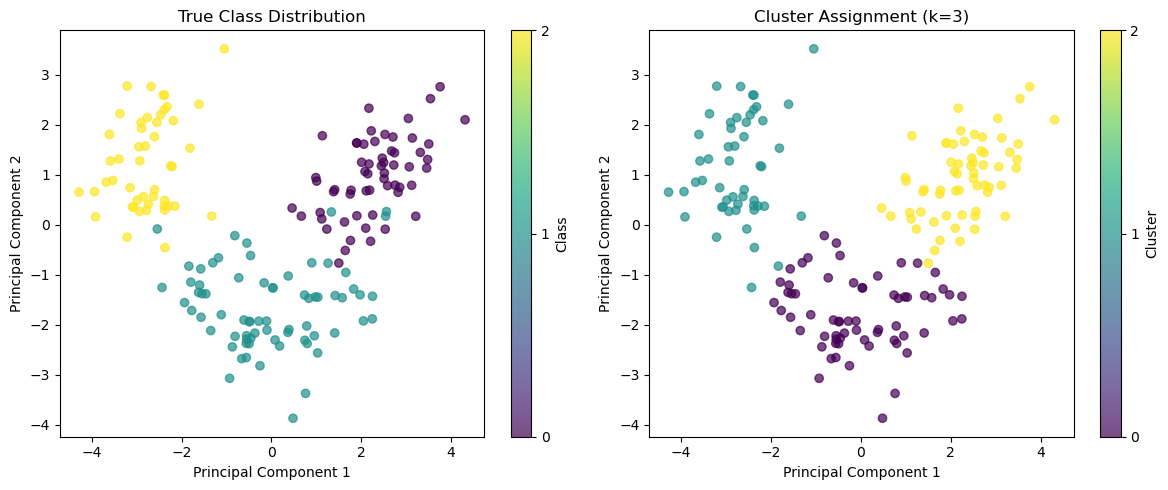


=== Cluster feature analysis ===

The most significant features of each cluster are:
Cluster 0: alcohol (z-score = -0.92)
Cluster 1: od280/od315_of_diluted_wines (z-score = -1.29)
Cluster 2: proline (z-score = 1.12)

Cross tabulation of clustering and real categories:
         Class_0  Class_1  Class_2  Total
cluster                                  
0              0       65        0     65
1              0        3       48     51
2             59        3        0     62
Total         59       71       48    178


In [39]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_score, completeness_score, silhouette_score
import matplotlib.pyplot as plt

# 1. Loading wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
true_labels = wine.target  # Real category label

# 2. Data standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. K-Means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
pred_labels = kmeans.fit_predict(scaled_data)

# 4. Calculate evaluation indicators
homogeneity = homogeneity_score(true_labels, pred_labels)
completeness = completeness_score(true_labels, pred_labels)
silhouette = silhouette_score(scaled_data, pred_labels)

# 5. Output result
print("=== Cluster evaluation indicators ===")
print(f"Homogeneity: {homogeneity:.3f}")
print(f"Completeness: {completeness:.3f}")
print(f"Silhouette Score: {silhouette:.3f}")

# 6. Visualize clustering results (first two principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(12, 5))

# Real category distribution
plt.subplot(1, 2, 1)
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], 
                     c=true_labels, cmap='viridis', alpha=0.7)
plt.title('True Class Distribution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Class')

# Distribution of clustering results
plt.subplot(1, 2, 2)
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], 
                     c=pred_labels, cmap='viridis', alpha=0.7)
plt.title('Cluster Assignment (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Cluster')

plt.tight_layout()
plt.show()

# 7. Cluster feature analysis
print("\n=== Cluster feature analysis ===")
df['cluster'] = pred_labels
cluster_means = df.groupby('cluster').mean()

# Identify the most distinctive features of each cluster
top_features = {}
for cluster in cluster_means.index:
    # Calculate the standardized difference between the cluster and the overall mean
    z_scores = (cluster_means.loc[cluster] - df.mean()) / df.std()
    top_feature = z_scores.abs().idxmax()
    top_features[cluster] = (top_feature, z_scores[top_feature])

print("\nThe most significant features of each cluster are:")
for cluster, (feature, z_score) in top_features.items():
    print(f"Cluster {cluster}: {feature} (z-score = {z_score:.2f})")

# 8. Crosstabs
cross_tab = pd.crosstab(index=df['cluster'], columns=true_labels, 
                       margins=True, margins_name="Total")
cross_tab.columns = [f"Class_{i}" for i in cross_tab.columns[:-1]] + ["Total"]
print("\nCross tabulation of clustering and real categories:")
print(cross_tab)

Q: Given the actual class labels, calculate the Homogeneity/Completeness for the optimal k.
A: Homogeneity: 0.879
Completeness: 0.873
Silhouette Score: 0.285

Q: What information does each of these metrics provide? 
A:
Homogeneity:
-The range of values is [0,1], with larger values indicating that each cluster only contains samples of a single category
-Measure whether each cluster contains only samples of a single category"

Completeness:
-The range of values is [0,1], with larger values indicating that samples of the same category are assigned to the same cluster
-Measuring whether samples of the same category are assigned to the same cluster

Silhouette Score:
-Value range [-1,1], the larger the value, the better the clustering effect
-Taking into account both intra cluster cohesion and inter cluster separation